In [98]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Exercise 4

In [99]:
class GridWorld:
    def __init__(self, grid_size=4, max_steps=100):
        self.grid_size = grid_size
        self.max_steps = max_steps
        self.num_actions = 4  # Up, Down, Left, Right
        self.actions = ['up', 'down', 'left', 'right']
        self.actions_map = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
        self.terminal_states = [(0, 0), (grid_size - 1, grid_size - 1)]
        self.reset()

    def reset(self):
        self.state = (self.grid_size - 1, 0)  # Start from lower left corner
        self.steps = 0
        return self.state

    def step(self, state, action, evaluate=False):
        if not evaluate:
            self.steps += 1

        if state in self.terminal_states:
            return state, 0, True  # Remain in the same terminal state
        
        if self.steps >= self.max_steps:
            return state, 0, True   

        x, y = state
        dx, dy = self.actions_map[action]
        new_x, new_y = x + dx, y + dy

        if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size:
            next_state = (new_x, new_y)
        else:
            next_state = (x, y)  # Stay in the same state if the action is invalid

        reward = -1  # Always receive a reward of -1 for each step
        done = next_state in self.terminal_states

        if not evaluate:
            self.state = next_state

        return next_state, reward, done

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))
        for terminal_state in self.terminal_states:
            grid[terminal_state] = -10  # Mark terminal states with a distinct value
        grid[self.state] = 1  # Mark current state with a value of 1
        print(grid)

In [100]:
env = GridWorld()

for _ in range(10):
    env.render()
    action = np.random.choice(env.actions)  # Choose a random action
    state, reward, done = env.step(env.state, action)
    print("Action:", action)
    print("State:", state)
    print("Reward:", reward)
    print("Done:", done)
    print()

    if done:
        break

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0. -10.]]
Action: down
State: (3, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0. -10.]]
Action: down
State: (3, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0. -10.]]
Action: left
State: (3, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0. -10.]]
Action: left
State: (3, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0. -10.]]
Action: down
State: (3, 0)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  1.   0.   0. -10.]]
Action: right
State: (3, 1)
Reward: -1
Done: False

[[-10.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   1.   0. -10.]]
Action: left
State: (3, 0)
Reward: -1
Done

## Exercise 5

In [106]:
def iterative_policy_evaluation(env, policy, threshold=1e-10, gamma=1.0):
    V = np.zeros((env.grid_size, env.grid_size))  # Initialize V arbitrarily
    delta = threshold + 1
    deltas = []

    while delta > threshold:
        delta = 0
        for i in range(env.grid_size):
            for j in range(env.grid_size):
                v = V[i, j]
                new_v = 0
                for action in env.actions:
                    next_state, reward, _ = env.step((i, j), action, evaluate=True)
                    new_v += policy * (reward + gamma * V[next_state[0], next_state[1]])

                V[i, j] = new_v
                delta = max(delta, abs(v - new_v))

        deltas.append(delta)

    return V, deltas

Estimated state values (V_pi):
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]


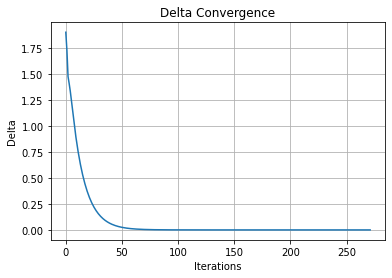

In [107]:
# Define the grid world environment
env = GridWorld()

# Define the equiprobable random policy
policy = 0.25  # Probability of taking each action

# Perform iterative policy evaluation
V_pi, delta_values = iterative_policy_evaluation(env, policy)

print("Estimated state values (V_pi):")
print(V_pi)

# Plot delta over time
plt.plot(delta_values)
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title('Delta Convergence')
plt.grid(True)
plt.show()

## Exercise 6